In [1]:
# import 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read data

input_dir = '../input/'
train_path = os.path.join(input_dir, 'train.csv')
train = pd.read_csv(train_path)

In [4]:
train.shape

(957919, 120)

In [5]:
train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,...,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,...,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,276527.540591,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,...,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,6.732441e+16,3155.991777,0.408426,0.499998
min,0.000000,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,...,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8.944400e+15,-415.240000,-0.151240,0.000000
25%,239479.500000,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,9.120900e+04,1.153100e+13,...,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,2.321100e+14,1306.200000,0.276560,0.000000
50%,478959.000000,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,2.896700e+05,5.043050e+14,...,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,1.327500e+16,3228.000000,0.473440,0.000000
75%,718438.500000,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,5.605600e+05,3.103100e+15,...,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,5.278700e+16,6137.900000,0.746210,1.000000
max,957918.000000,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1.913700e+06,1.042400e+16,...,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,3.249900e+17,13151.000000,2.743600,1.000000


In [6]:
train['id'].nunique()

957919

In [73]:
# data types
num_cols = train.select_dtypes(include=['float64','int64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

In [11]:
# Null values
null_cols = train.columns[~train.isnull().any()]

In [13]:
null_cols

Index(['id', 'claim'], dtype='object')

In [77]:
# target class
class_0 = len(train[train['claim']==0])
class_1 = len(train[train['claim']==1])

In [78]:
class_0

480404

In [79]:
class_1

477515

In [88]:
# number of rows with no null values

len(train.dropna())

359464

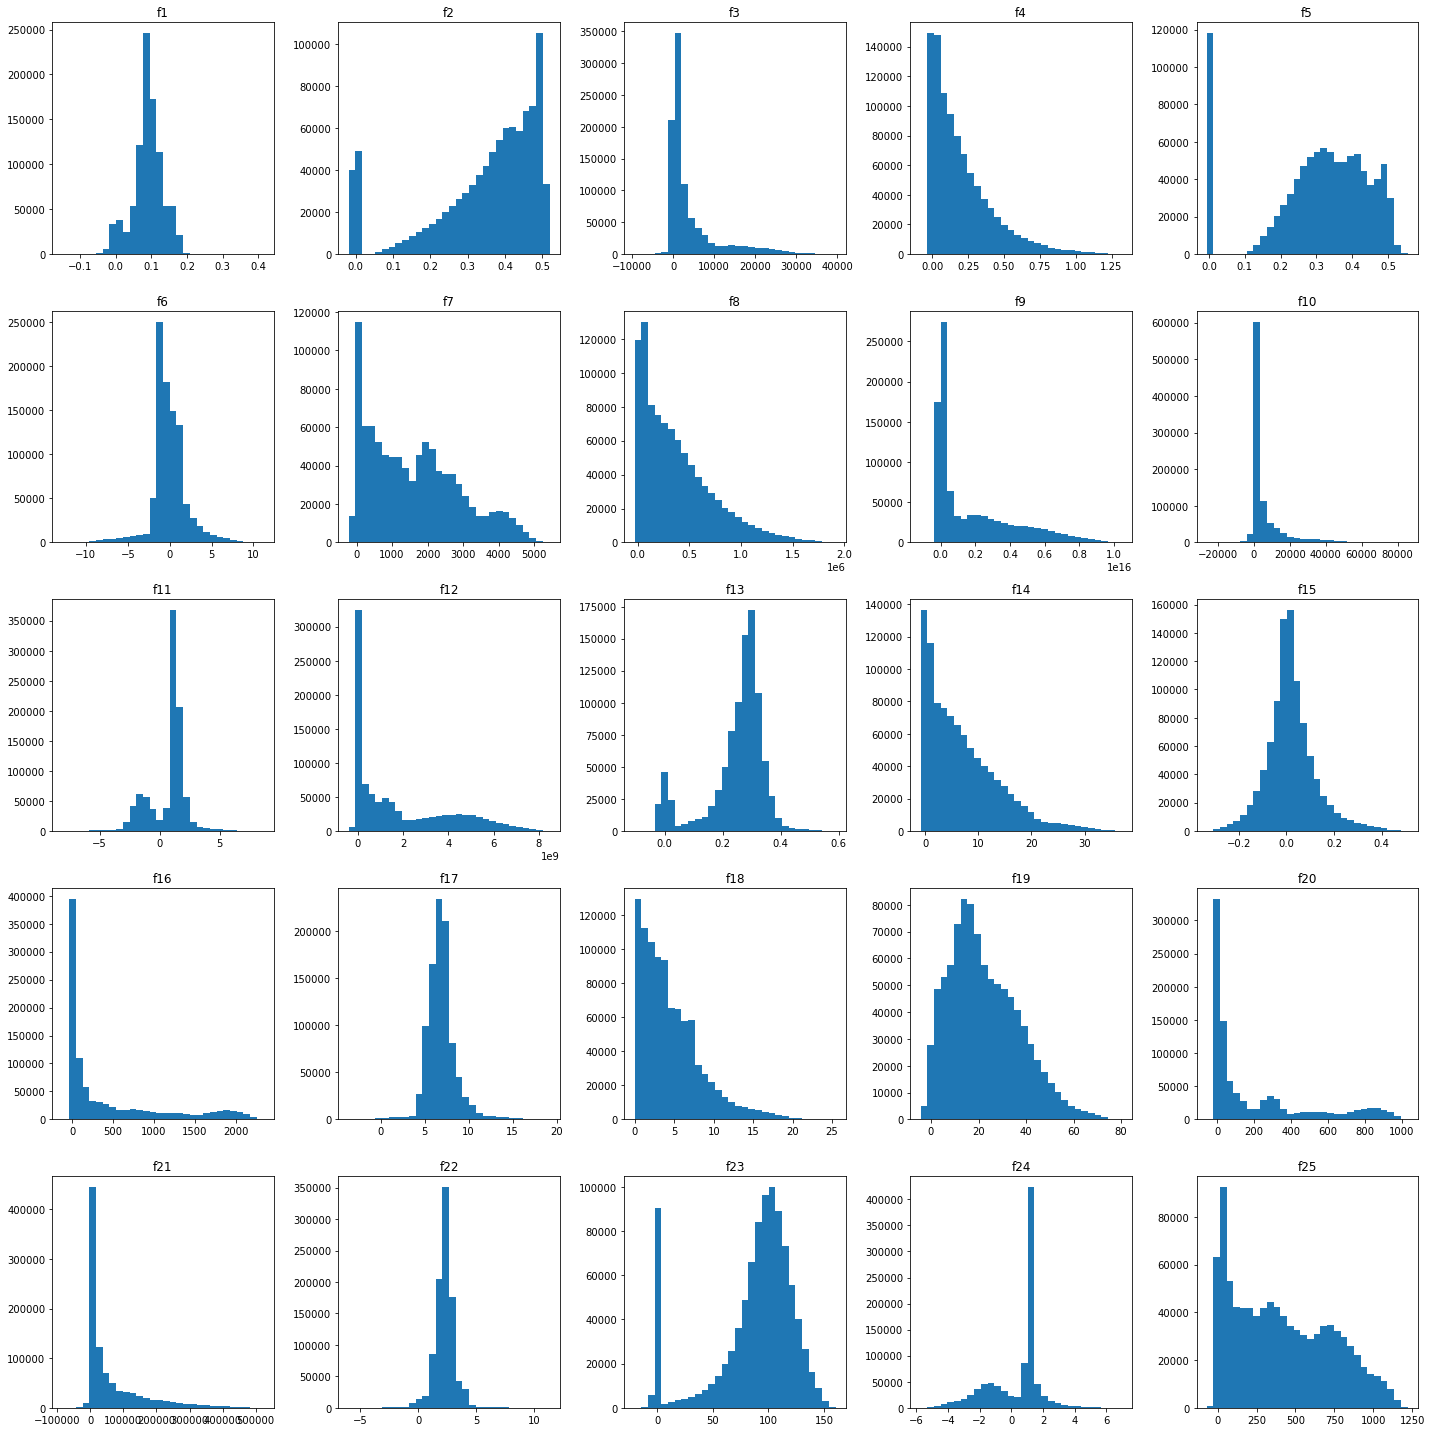

In [29]:
# feature distributions

fig, axs = plt.subplots(5,5, figsize = (20,20))

axs = axs.flatten()

for idx, ax in enumerate(axs):
    ax.hist((train[f'f{idx+1}']), bins =30)
    ax.set_title(f'f{idx+1}')
    
plt.tight_layout()
plt.show()
